# Cleaning and rearranging the data

First step, cleaning the data. The dataset will be rearranged in order to develop the task of classification. For the specific task the most important features are the syndrome_ids and the features. Then the following steps will be performed:

- tSNE plotting
- Classification. Given images features, classify into eight syndrome_ids

In [60]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

obj = pd.read_pickle('mini_gm_public_v0.1.p')

In [61]:
count = 0
subjects = []
print("Qtd de assuntos for sindrome: ")
for i in obj:
    print(len(obj[i].keys()))
    subjects.append(len(obj[i].keys()))

Qtd de assuntos for sindrome: 
83
180
60
59
62
64
127
137
76
93


In [62]:
count = 0
test = {}
my_list = []
for i in obj['300000082']:
    for j in obj['300000082'][i].keys():
        my_list.append(obj['300000082'][i][j])
        count += 1

#print(len(my_list))
#print(type(my_list[0]))

In [63]:
count = 0
test = {}
my_list = []
value = np.empty(320)
for i in obj['300000080']:
    for j in obj['300000080'][i].keys():
        my_list.append(obj['300000080'][i][j])
        count += 1

#print(len(my_list))
#print(type(my_list[0]))

In [64]:
count = 0
test = {}
my_list = []
for i in obj['700018215']:
    for j in obj['700018215'][i].keys():
        my_list.append(obj['700018215'][i][j])
        count += 1

#print(len(my_list))
#print(type(my_list[0]))

In [65]:
count = 0
imgs_total = []
data = {}
encoding_values = []
value = np.empty(320)

print("Qtd imagens for sindrome: ")
for i in obj:
    for j in obj[i]:
        for img in obj[i][j]:
            count +=1
            #value = obj[i][j][img]
            encoding_values.append(obj[i][j][img])

    data[i] = encoding_values
    encoding_values = []

    imgs_total.append(count)
    count = 0
print(imgs_total)

Qtd imagens for sindrome: 
[98, 198, 64, 65, 67, 74, 136, 210, 89, 115]


In [66]:
print("Total images = ", sum(imgs_total))

Total images =  1116


In [67]:
data.keys()

dict_keys(['300000082', '300000080', '700018215', '100610883', '100180860', '300000018', '100192430', '300000034', '100610443', '300000007'])

In [68]:
values = []
syndrome_ids = []

In [69]:
for i in data:
    for j in data[i]:
        values.append(j)
        syndrome_ids.append(i)


In [70]:
df = {
    "images encoding" : values,
    "syndrome" : syndrome_ids
}

In [71]:
df = pd.DataFrame.from_dict(df)

In [72]:
df

,images encoding,syndrome
0,"[-0.03718013, 1.741486, 1.2061033, -0.45145318...",300000082
1,"[2.4249947, 0.17991967, 2.9503245, 0.37993023,...",300000082
2,"[-1.7893314, -0.21621145, 0.43431538, -0.55232...",300000082
3,"[-1.1436926, -0.7146209, 0.31948757, 0.4556819...",300000082
4,"[0.81417066, 1.3274913, 0.84728503, -0.2123311...",300000082
...,...,...
1111,"[0.8748908, 2.436136, -1.7883539, 0.012363119,...",300000007
1112,"[0.72461146, -0.39363632, 1.6491495, 1.1410508...",300000007
1113,"[-1.5241687, -1.470528, 0.5967394, 1.2362618, ...",300000007
1114,"[-0.27531493, -1.003529, 0.8483238, -0.2545608...",300000007


Creation of a definitive dataset

In [73]:
features_id = []
for i in range(1,321):
  features_id.append(f"feature_{i}")

In [74]:
data = pd.DataFrame(columns=features_id)

In [75]:
data

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_311,feature_312,feature_313,feature_314,feature_315,feature_316,feature_317,feature_318,feature_319,feature_320


In [76]:
for i in range(1116):
  data.loc[len(data.index)] = list(df['images encoding'][i])

In [77]:
data

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_311,feature_312,feature_313,feature_314,feature_315,feature_316,feature_317,feature_318,feature_319,feature_320
0,-0.037180,1.741486,1.206103,-0.451453,-0.736373,1.705392,0.738040,1.027470,0.691436,-0.505316,...,1.783927,1.587222,-1.522482,-3.935935,0.007990,0.668852,1.129786,0.097900,-0.768619,0.271600
1,2.424995,0.179920,2.950325,0.379930,-0.158152,-0.238334,-0.436916,1.179637,0.143056,1.888786,...,-0.665296,0.367323,-2.437823,-2.704050,1.696490,-0.471431,2.529153,1.107004,-3.214602,-1.450313
2,-1.789331,-0.216211,0.434315,-0.552323,-1.065345,1.817165,0.006342,0.568629,-1.739190,-1.749137,...,0.439080,0.861753,-0.544255,-0.486401,-2.228478,0.964719,-0.297413,-0.623660,-0.208614,0.236617
3,-1.143693,-0.714621,0.319488,0.455682,1.571120,-0.837411,0.726402,0.818733,-1.069280,-0.101228,...,-0.414648,-0.121709,-1.838737,-0.405826,0.190536,0.651180,0.539327,-0.103917,-3.094141,0.867695
4,0.814171,1.327491,0.847285,-0.212331,-0.161848,0.468158,-1.385634,2.383406,0.103738,0.387873,...,-0.321441,0.560821,-4.187195,-0.589926,0.104791,1.157607,1.382157,-0.184572,-2.582998,0.356301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,0.874891,2.436136,-1.788354,0.012363,-0.126630,0.017039,-2.897007,-1.107453,-1.382568,0.128258,...,0.511603,-2.191810,-1.785794,-3.329948,-0.046203,-0.818496,-2.515900,0.292273,0.122881,0.763220
1112,0.724611,-0.393636,1.649150,1.141051,0.140459,-0.963627,-0.347281,-1.599028,-1.849923,0.872322,...,-0.740028,-0.669405,0.038592,-0.303483,-0.938461,0.503595,0.107434,1.579869,-1.386467,1.287389
1113,-1.524169,-1.470528,0.596739,1.236262,-0.269673,-1.351564,-0.396654,-1.317100,-1.162278,-0.174212,...,1.119824,0.116515,0.167950,0.541960,0.304160,1.813851,-0.044149,-0.324914,-1.845145,0.651195
1114,-0.275315,-1.003529,0.848324,-0.254561,-0.334891,-0.977900,-0.617443,-0.567237,-1.013448,-1.756144,...,1.251905,-0.247511,-0.592460,-0.877069,-0.919258,1.034928,2.437233,0.763764,-1.013347,1.119919


In [78]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

syndrome_ids = label_encoder.fit_transform(syndrome_ids)

In [79]:
data["syndrome"] = syndrome_ids

In [80]:
data

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_312,feature_313,feature_314,feature_315,feature_316,feature_317,feature_318,feature_319,feature_320,syndrome
0,-0.037180,1.741486,1.206103,-0.451453,-0.736373,1.705392,0.738040,1.027470,0.691436,-0.505316,...,1.587222,-1.522482,-3.935935,0.007990,0.668852,1.129786,0.097900,-0.768619,0.271600,8
1,2.424995,0.179920,2.950325,0.379930,-0.158152,-0.238334,-0.436916,1.179637,0.143056,1.888786,...,0.367323,-2.437823,-2.704050,1.696490,-0.471431,2.529153,1.107004,-3.214602,-1.450313,8
2,-1.789331,-0.216211,0.434315,-0.552323,-1.065345,1.817165,0.006342,0.568629,-1.739190,-1.749137,...,0.861753,-0.544255,-0.486401,-2.228478,0.964719,-0.297413,-0.623660,-0.208614,0.236617,8
3,-1.143693,-0.714621,0.319488,0.455682,1.571120,-0.837411,0.726402,0.818733,-1.069280,-0.101228,...,-0.121709,-1.838737,-0.405826,0.190536,0.651180,0.539327,-0.103917,-3.094141,0.867695,8
4,0.814171,1.327491,0.847285,-0.212331,-0.161848,0.468158,-1.385634,2.383406,0.103738,0.387873,...,0.560821,-4.187195,-0.589926,0.104791,1.157607,1.382157,-0.184572,-2.582998,0.356301,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,0.874891,2.436136,-1.788354,0.012363,-0.126630,0.017039,-2.897007,-1.107453,-1.382568,0.128258,...,-2.191810,-1.785794,-3.329948,-0.046203,-0.818496,-2.515900,0.292273,0.122881,0.763220,4
1112,0.724611,-0.393636,1.649150,1.141051,0.140459,-0.963627,-0.347281,-1.599028,-1.849923,0.872322,...,-0.669405,0.038592,-0.303483,-0.938461,0.503595,0.107434,1.579869,-1.386467,1.287389,4
1113,-1.524169,-1.470528,0.596739,1.236262,-0.269673,-1.351564,-0.396654,-1.317100,-1.162278,-0.174212,...,0.116515,0.167950,0.541960,0.304160,1.813851,-0.044149,-0.324914,-1.845145,0.651195,4
1114,-0.275315,-1.003529,0.848324,-0.254561,-0.334891,-0.977900,-0.617443,-0.567237,-1.013448,-1.756144,...,-0.247511,-0.592460,-0.877069,-0.919258,1.034928,2.437233,0.763764,-1.013347,1.119919,4


# Plotting t-SNE

In [81]:
import plotly.express as px

In [82]:
X = data.drop('syndrome', axis=1).values # X = df.drop("syndrome", axis=1).values
y = data['syndrome']

In [83]:

fig = px.scatter_3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], color=y, opacity=0.8)
fig.show()

In [84]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

With PCA we can visualize some cluster formation around the 8 labels (syndromes ids). Each color in the graph tends to be closer to each other forming a syndrome id.

In [85]:
fig = px.scatter(x=X_pca[:, 0], y=X_pca[:, 1], color=y)
fig.update_layout(
    title="PCA visualization of Genetic Syndromes dataset",
    xaxis_title="First Principal Component",
    yaxis_title="Second Principal Component",
)
fig.show()

In [86]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
tsne.kl_divergence_

2.0077688694000244

With t-SNE we can visualize some cluster formation around the 8 labels (syndromes ids). Each color in the graph tends to be closer to each other forming a syndrome id.

The cluster formation is better visualized with t-SNE.

In [87]:
fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=y)
fig.update_layout(
    title="t-SNE visualization of Genetic Syndromes dataset",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

In [88]:
# All possible variables, syndromes id
y.unique()

array([8, 7, 9, 3, 0, 5, 1, 6, 2, 4])

In [89]:
print(X.shape)
print(y.shape)

(1116, 320)
(1116,)


In [90]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics

In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn_cosine = KNeighborsClassifier(metric='cosine') # Coside distance (1 - cosine similarity)

In [92]:
k_range = list(range(1, 50))

In [93]:
# range of neighbors
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]}


# Performing cosine distance calculation with 10 fold cross validation

In [94]:
grid = GridSearchCV(knn_cosine, param_grid, cv=10)
grid.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(metric='cosine'),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [95]:
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.67465412 0.65758526 0.71681145 0.72935972 0.75173745 0.74906692
 0.76340894 0.76698037 0.77146879 0.76970721 0.77509653 0.78224743
 0.77417954 0.77413932 0.76791345 0.77418758 0.77417954 0.77597329
 0.77329472 0.76972329 0.77149292 0.77146879 0.77236969 0.7723536
 0.77413127 0.77592503 0.78044562 0.77411519 0.77142053 0.77412323
 0.77233752 0.77591699 0.77501609 0.7660473  0.77051963 0.76782497
 0.76870978 0.76781692 0.77502413 0.77949646 0.77323842 0.77143662
 0.7678491  0.76875    0.76786519 0.76875804 0.76875804 0.76876609
 0.76695624]


Text(0, 0.5, 'Cross-Validated Accuracy')

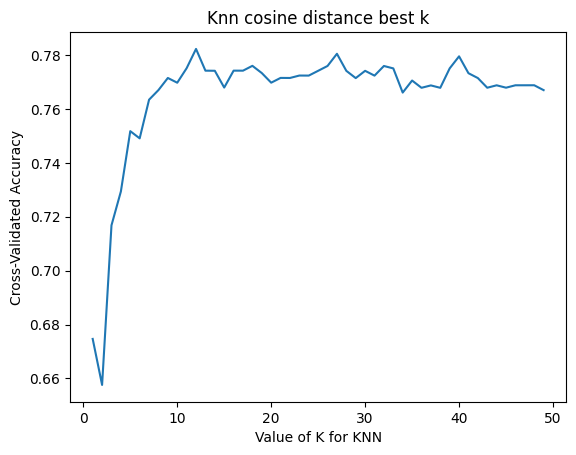

In [96]:
plt.title('Knn cosine distance best k')
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [97]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7822474259974259
{'n_neighbors': 12}
KNeighborsClassifier(metric='cosine', n_neighbors=12)


# Performing euclidean distance with 10 fold cross validation

In [98]:
knn_euclidean = KNeighborsClassifier()

grid = GridSearchCV(knn_euclidean, param_grid, cv=10)
grid.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [99]:
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.60835746 0.58859395 0.62264318 0.66117278 0.67643179 0.68717021
 0.69792471 0.70146396 0.71225064 0.70686133 0.71315959 0.71675515
 0.72392214 0.73019627 0.7328668  0.72839447 0.72574003 0.72216055
 0.73203024 0.7311213  0.73919723 0.74008205 0.73829633 0.7418758
 0.73470077 0.73916506 0.73469273 0.73468468 0.74009009 0.7409749
 0.73832046 0.7329231  0.7320222  0.72574807 0.72484717 0.72935972
 0.72845077 0.73203024 0.73203829 0.73381596 0.73291506 0.73381596
 0.73022844 0.72932754 0.72573198 0.72484717 0.72485521 0.73470077
 0.73469273]


Text(0, 0.5, 'Cross-Validated Accuracy')

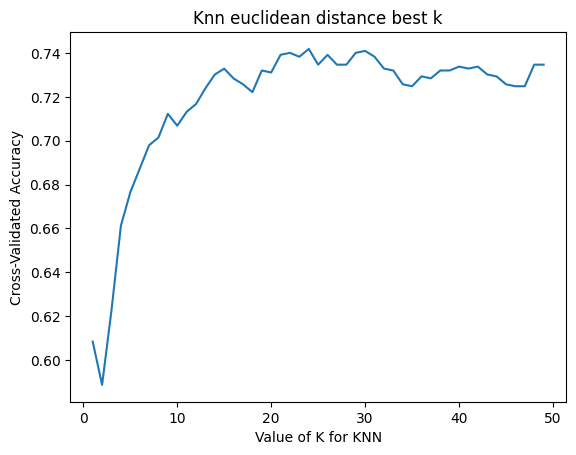

In [100]:
plt.title('Knn euclidean distance best k')
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [101]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7418758043758045
{'n_neighbors': 24}
KNeighborsClassifier(n_neighbors=24)


# Classification

Performing classfication of genetic syndromes dataset using KNN with cosine distance and euclidean distance

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=21)

In [103]:
knn_cosine = KNeighborsClassifier(n_neighbors=12, metric='cosine')
knn_cosine.fit(X_train, y_train)

y_pred_cosine = knn_cosine.predict(X_test)

In [104]:
print("   Confusion matrix knn cosine:\n")
print(confusion_matrix(y_test, y_pred_cosine))

   Confusion matrix knn cosine:

[[10  3  0  0  0  0  2  3  0  0]
 [ 1 27  0  0  1  0  1  1  0  0]
 [ 1  1 23  0  0  0  0  0  0  0]
 [ 1  1  1  6  1  1  2  3  0  1]
 [ 0  0  0  0 19  1  4  1  0  1]
 [ 0  1  0  1  3 12  2  0  0  0]
 [ 1  0  0  1  0  0 51  1  1  0]
 [ 1  1  2  0  0  0  3 38  2  0]
 [ 0  1  0  1  0  1  0  1 19  0]
 [ 2  1  0  1  0  0  2  6  1  5]]


In [105]:
print("               Classification report knn cosine:\n")
print(classification_report(y_test, y_pred_cosine))

               Classification report knn cosine:

              precision    recall  f1-score   support

           0       0.59      0.56      0.57        18
           1       0.75      0.87      0.81        31
           2       0.88      0.92      0.90        25
           3       0.60      0.35      0.44        17
           4       0.79      0.73      0.76        26
           5       0.80      0.63      0.71        19
           6       0.76      0.93      0.84        55
           7       0.70      0.81      0.75        47
           8       0.83      0.83      0.83        23
           9       0.71      0.28      0.40        18

    accuracy                           0.75       279
   macro avg       0.74      0.69      0.70       279
weighted avg       0.75      0.75      0.74       279



In [106]:
# Generating file txt fo the report
with open("classification_report_knn_cosine.txt", "w") as text_file:
    text_file.write(" %s" % classification_report(y_test, y_pred_cosine))

In [107]:
knn_euclidean = KNeighborsClassifier(n_neighbors=24)
knn_euclidean.fit(X_train, y_train)

y_pred_euclidean = knn_euclidean.predict(X_test)

In [108]:
print("   Confusion matrix knn cosine:\n")
print(confusion_matrix(y_test, y_pred_euclidean))

   Confusion matrix knn cosine:

[[10  1  0  2  0  0  2  2  0  1]
 [ 1 26  0  0  0  0  1  2  1  0]
 [ 1  1 21  1  0  0  0  1  0  0]
 [ 0  2  1 10  0  0  1  3  0  0]
 [ 0  0  0  0 18  0  7  1  0  0]
 [ 0  2  0  1  5  8  2  1  0  0]
 [ 0  0  1  2  0  0 51  1  0  0]
 [ 0  2  0  1  0  0  5 38  1  0]
 [ 0  1  0  1  0  0  0  2 19  0]
 [ 3  1  0  1  0  0  3  7  0  3]]


In [109]:
print("               Classification report knn euclidean:\n")
print(classification_report(y_test, y_pred_euclidean))

               Classification report knn euclidean:

              precision    recall  f1-score   support

           0       0.67      0.56      0.61        18
           1       0.72      0.84      0.78        31
           2       0.91      0.84      0.88        25
           3       0.53      0.59      0.56        17
           4       0.78      0.69      0.73        26
           5       1.00      0.42      0.59        19
           6       0.71      0.93      0.80        55
           7       0.66      0.81      0.72        47
           8       0.90      0.83      0.86        23
           9       0.75      0.17      0.27        18

    accuracy                           0.73       279
   macro avg       0.76      0.67      0.68       279
weighted avg       0.75      0.73      0.72       279



In [110]:
# Generating file txt fo the report
with open("classification_report_knn_euclidean.txt", "w") as text_file:
    text_file.write(" %s" % classification_report(y_test, y_pred_euclidean))

# ROC AUC Curve

Generating the ROC AUC Curve both from KNN cosine distance and KNN euclidean distance.
Given the the total 320 features, the best feature were selected to put in the graph. 

In [111]:
from sklearn.preprocessing import label_binarize

In [112]:
# Binarize the labels
y_train_bin = label_binarize(y_train, classes=np.unique(y))
y_test_bin = label_binarize(y_test, classes=np.unique(y))

In [113]:
classifiers = {
    'knn Cosine distance': KNeighborsClassifier(n_neighbors=12,metric='cosine'),
    'knn Euclidean distance': KNeighborsClassifier(n_neighbors=24)
}

In [114]:
y_train_bin = label_binarize(y_train, classes=np.unique(y))
y_test_bin = label_binarize(y_test, classes=np.unique(y))

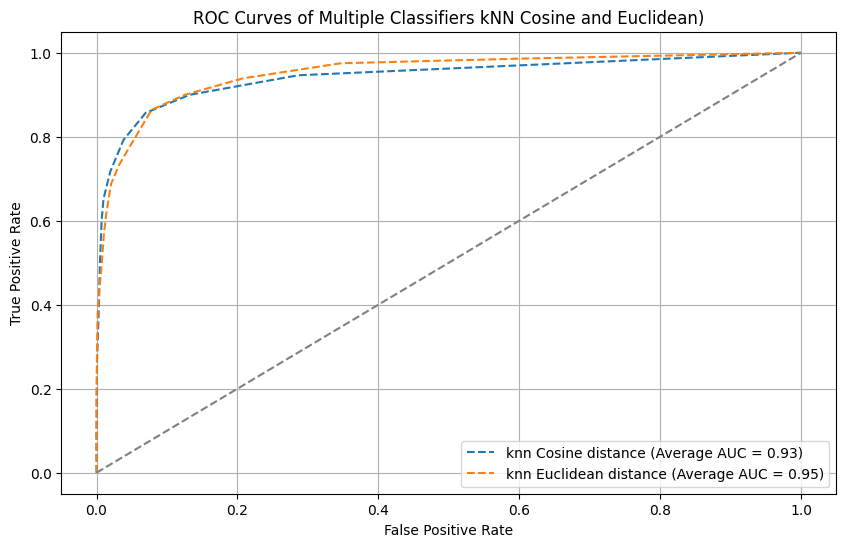

The best classifier is: knn Euclidean distance with an average AUC score of 0.95


In [115]:
best_classifier = None
best_auc_score = -1

plt.figure(figsize=(10, 6))

for name, classifier in classifiers.items():
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    clf = classifier.fit(X_train, y_train)
    y_score = clf.predict_proba(X_test)
    n_classes = y_train_bin.shape[1]
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_score[:, i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = roc_auc_score(y_test_bin, y_score, average="micro")

    avg_auc_score = np.mean(list(roc_auc.values()))

    if avg_auc_score > best_auc_score:
        best_auc_score = avg_auc_score
        best_classifier = name

    plt.plot(fpr["micro"], tpr["micro"],
             label=f'{name} (Average AUC = {avg_auc_score:.2f})',
             linestyle='--')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves of Multiple Classifiers kNN Cosine and Euclidean)')
plt.legend()
plt.grid(True)
plt.savefig('ROC_curve.png')
plt.show()

print(f"The best classifier is: {best_classifier} with an average AUC score of {best_auc_score:.2f}")

In [116]:
results = "knn cosine distance (Average AUC = 0.93)\nTop-K = 12\n\nknn Euclidean distance (Average AUC = 0.95)\nTop-K = 24"

In [117]:
# Saving report in txt file
with open("results.txt", "w") as text_file:
    text_file.write(" %s" % results)

In [118]:
print(results)

knn cosine distance (Average AUC = 0.93)
Top-K = 12

knn Euclidean distance (Average AUC = 0.95)
Top-K = 24
